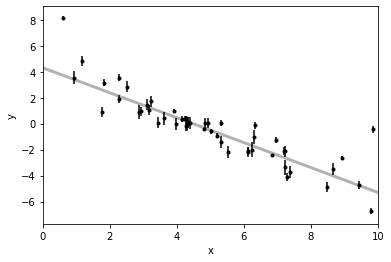

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


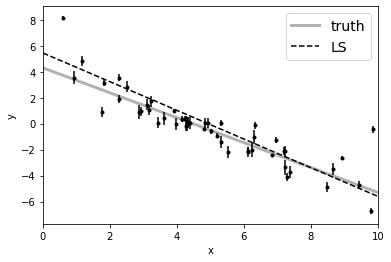

In [21]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [22]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


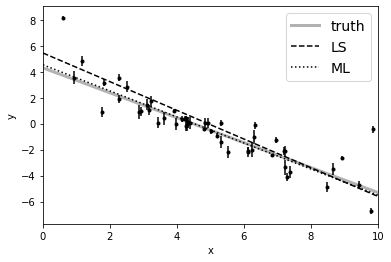

In [23]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [32]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

In [41]:
def log_prior(theta):
    a, b, c = theta
    #flat priors on b, c
    if not 1.0 < b < 2.0 and 1.0 < c < 2.0:
        return -np.inf
    #gaussian prior on a
    mu = 10
    sigma = 1
    return np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(a-mu)**2/sigma**2

In [42]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [43]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);


-61.4541006578499
-61.450287080174846
-61.451446930407876
-61.45263060315908
-61.45208650763377
-61.45412372999364
-61.45172294117812
-61.45255592777893
-61.45035785906365
-61.453000104637944
-61.45257714827912
-61.452869546704406
-61.45288528042383
-61.45274677008247
-61.45128889162102
-61.451178185040376
-61.45182811915465
-61.4516619407531
-61.45278249033622
-61.45280049121689
-61.44993348004011
-61.45028049472214
-61.45054475324779
-61.45297035107196
-61.45232048972782
-61.45260658006123
-61.44924280415342
-61.45077179477969
-61.451153563685
-61.451130787338855
-61.45253603331052
-61.45232636485098
-61.45042511689756
-61.45180049878868
-61.45221652082832
-61.453071654724376
-61.45241512589337
-61.452887953915614
-61.45277794859014
-61.452575512203246
-61.45109648602887
-61.451498701358204
-61.452172972573166
-61.452783522442395
-61.44978337909141
-61.4525315781427
-61.45329372676364
-61.450764281748874
-61.45450194311459
-61.4527818835639
-61.45192208628968
-61.45256576457914
-61.4

-61.11559842503277
-60.77285975496877
-62.369245568415344
-61.59345114755717
-61.53450935276325
-62.35702654260351
-61.6719794726658
-61.479113238346294
-61.55796314029954
-61.17095560304755
-61.34359535103507
-61.861456455204994
-62.37254772955914
-61.308803521502554
-61.575006454062226
-60.98643765060272
-61.34798151459319
-60.825750256652576
-61.62557707922032
-61.711460712471705
-62.17049542925365
-61.57286277910299
-61.43795686680903
-61.29763156717692
-61.574143818882995
-61.381792452719445
-61.33280376469183
-61.127092698699094
-61.713293112203225
-61.406490768820056
-59.55122804393777
-61.59324247842239
-61.284115283497265
-61.57517102308702
-61.52046893840185
-61.57965034203226
-61.55881204769688
-61.723163596617084
-61.45153739930559
-61.087974786217394
-61.484873541013194
-61.76666339240456
-61.27673567107805
-61.64291671198938
-61.30213321780804
-61.56794923381585
-61.41368597070897
-60.309623296302185
-61.14262420561347
-60.893500641097596
-60.82034511937288
-61.6601262066

-62.03816707393402
-60.66978378386283
-61.58843327197592
-61.88226272789426
-61.612179232745575
-60.777776937690405
-61.98122496394686
-60.95603089442934
-61.09380728437115
-60.1561782475561
-61.96641444585162
-61.508884709085216
-60.93002084078967
-60.47548380346128
-59.75495996503761
-62.69381812210726
-63.64104995870121
-62.23142659913157
-61.46619515859959
-58.677244592833134
-61.22542428058906
-62.2813670894049
-62.194457346812285
-61.2135546495823
-61.55359916366415
-60.65207554220039
-61.65608635589435
-61.6901279202164
-60.91642730298979
-59.725678694274706
-60.55006831892743
-60.21574278974652
-61.21885199561586
-61.86265618815093
-60.689142619764084
-61.86475655597699
-61.0185124596267
-61.102814178700896
-62.158301376761486
-61.77140991810644
-60.87857891994726
-60.55527813342434
-61.383691627844236
-60.54459579700172
-60.502693716824524
-59.76019883563346
-63.626907338269284
-61.84004687005799
-61.612025360764974
-62.268123725146935
-57.76008331422091
-60.79766038658711
-59

-61.675850992284985
-61.673646291892766
-61.40330816308186
-57.761955386108674
-61.05488094188204
-62.38149498012405
-61.40178157867204
-61.507114927817405
-61.59134321045246
-60.950345338210575
-60.954417137660556
-60.93342531257288
-62.83105316175194
-61.580809710837514
-58.3599959405677
-60.46750339060853
-61.708275609192626
-57.19669432374869
-59.8485357501318
-61.618126406288994
-60.541131957797155
-60.884881753489815
-62.17513415698586
-61.43963116363847
-60.97679783180981
-59.60177789652684
-62.8173765677487
-60.69762248693017
-61.58588564416099
-61.043023107065586
-61.74171395072918
-61.64683092899691
-60.77418750111099
-58.787932091756375
-58.482844449625205
-61.753091990798474
-60.6956917681076
-60.89583126375259
-61.706682943912604
-61.605736446534635
-61.50768450145493
-60.872579381179534
-62.66983089289861
-61.96175637454101
-62.49438378530425
-61.67912491621322
-61.65595017557227
-62.271943715922944
-60.77044529410515
-61.119704086185706
-57.33376850513114
-61.48326065287

-60.7340395485994
-61.50673376086837
-62.05627261491521
-59.1191370374226
-59.604027748863736
-62.02602845787437
-61.29451552739481
-61.47289331582665
-60.84094771993596
-60.895217903146055
-60.36969123071927
-61.36368946476457
-61.27303109527798
-62.11459520867027
-61.97917066051608
-59.876552565812865
-61.51068528658769
-60.67581290520814
-63.410555246212425
-62.26075893183988
-60.73143974217817
-60.64629323086551
-62.02806818419326
-61.40963617743509
-61.76221497866914
-60.63229595931463
-61.721870781575035
-62.63491319942143
-61.37115075308039
-59.49773891027933
-61.77658778051991
-61.045915388859356
-60.53742779765388
-61.268416636876964
-59.47989528628294
-60.40093543481132
-60.72811816910267
-60.86631610905759
-59.4665549872168
-60.17874471733877
-60.320488922474546
-61.32324784582578
-60.93925571201951
-62.04703289432941
-61.272096403029146
-62.0536560296622
-60.5101887412322
-61.28476006940565
-59.571399323349034
-59.93806900960076
-60.514796340332545
-61.401098093109354
-62.2

-60.63236865250132
-60.76303949508711
-60.75649004902065
-60.26537338057672
-60.90883310030666
-63.4298348671376
-61.06585881048017
-61.96455378073474
-60.67463626022713
-61.39983892711665
-60.627048752738666
-60.104378333010516
-61.28931749241909
-59.45326700742477
-58.219336309819326
-60.93311948935887
-65.23734903061703
-61.840175618528534
-61.10368855388249
-61.11738614732047
-60.68467300795748
-60.82008694634558
-60.570135956022604
-61.31930012961589
-61.52460324461856
-61.354618660431
-59.65673739037159
-59.962990062619916
-62.826541973275916
-60.06965476854665
-60.90946693231107
-63.630680917295166
-60.624313167272454
-60.7255815083531
-60.440118432068445
-63.31802274090505
-61.1340457337039
-61.96798283372787
-61.00828995226455
-59.64039331790214
-60.38739401525152
-60.62492385538336
-59.598594562402695
-60.15996171792212
-60.88723708067212
-60.511000494864916
-60.64228934509994
-60.838067833459256
-57.684876184135206
-61.72414761073464
-61.43725210869302
-61.369007564538876
-6

-58.23309801299279
-61.14957927608022
-60.3875114489924
-61.1171537142606
-60.49626869536234
-60.10407891200794
-61.0791668999868
-60.34755791692771
-60.57609054583128
-60.937611004870064
-60.67376548568652
-59.50767981655849
-61.3790965110492
-60.827770020982726
-61.33506755847424
-59.99965227702804
-58.27547444833796
-59.761300613387235
-60.76383154273814
-60.150910922652685
-63.300729527109596
-60.75353593817833
-60.52007233329758
-61.452520230071855
-59.148566787716646
-61.1682429269347
-60.5796131675027
-62.557342230655536
-60.692028671114784
-61.93540358707459
-60.10499889945724
-58.00900033964283
-60.670414276662235
-60.149368452480694
-62.40821855054314
-61.0822291382106
-60.92128022945049
-60.4666353939823
-60.11420479416464
-61.37086352764031
-60.83942790735982
-60.94589674990951
-60.15644612806599
-56.85212842155157
-60.13516973541648
-58.62292124307773
-62.655107281913786
-62.020420450820176
-60.13338060541476
-59.27405431946848
-58.79178102728717
-61.24406261563966
-60.634

-61.36318486306165
-60.17064619912941
-61.80624940780465
-61.70015895427457
-59.85594302232578
-59.32097721254805
-61.75490140628848
-61.36600764845772
-58.236512696288095
-60.50334548140418
-62.617092864371806
-61.245708108287054
-61.12428084041499
-58.8844904355079
-64.2159094609734
-62.172978574311784
-61.49253539678775
-60.17467765408133
-60.77437456794194
-60.34795933937312
-62.48188415183007
-59.93428672126805
-59.26297633848762
-61.90927526082307
-59.31746019447251
-62.86974074728174
-62.430785215313456
-60.57243488927809
-60.49260310469887
-59.56665086906166
-61.584324719695736
-58.86536800853674
-61.25611625650976
-62.84156808557069
-60.25895468190776
-60.72011515885217
-59.67359846508835
-61.88506971630926
-59.496095989071414
-61.175196661273276
-60.20546441602471
-61.95767604273213
-61.3525081906724
-60.95949592785766
-60.15642763067351
-60.74272040094454
-62.997279759484
-61.653338885901825
-60.498674577919545
-60.228917353359144
-60.78492040466443
-61.0122935598169
-61.582

-59.238077910552406
-59.78868508938228
-60.7410425890082
-61.21746792810904
-62.23579796043272
-59.83581832627289
-60.62905635482887
-62.43576900889906
-59.802036526652486
-59.6582955573718
-60.366841767424134
-63.281875470401985
-60.43741308759051
-63.34589564153588
-62.7163966006227
-62.41565555293349
-60.03529494552562
-61.0045425112557
-61.33799188795289
-62.04414541177698
-61.502477416038964
-62.06434899439847
-59.625309114852314
-60.718521081211634
-59.88213533104951
-61.30028788914029
-57.29229446285413
-62.28546806554841
-62.550761885762235
-62.37552704735034
-59.38875274648184
-58.9925166415497
-61.03344073844111
-60.679807468388034
-60.98217894391402
-61.67370849531128
-62.74878363149211
-60.79506645498318
-60.6955867554955
-60.78641018745783
-61.33437103541
-59.5536269688664
-59.47009359471626
-60.91340726938458
-62.0756995145341
-61.01122661298077
-61.338402895191614
-62.77902972089964
-61.406371392066106
-61.08539384549696
-60.96191940633325
-60.57559470793851
-63.22527907

-60.09214648094968
-59.63631263894591
-62.73499064549514
-60.872194930504264
-60.26426263427067
-58.482290513827515
-59.937500142565156
-60.011656449160114
-60.624181473661984
-61.29114760826004
-61.94182872509792
-60.227740025113775
-59.65243525875533
-60.682694745147714
-57.44788777455615
-60.37380183171714
-61.66143085163121
-60.06152373479823
-61.49731963993924
-60.66097117183181
-60.78823861361865
-60.735482362506204
-60.84624294957152
-59.27191164645324
-59.91670800282935
-60.531340913111386
-62.558282524502324
-59.86355069001502
-60.3319528673167
-62.99967023087533
-60.2940130944886
-60.948105558394154
-59.86271293553706
-62.86896824275082
-61.298298332328194
-59.968423497499835
-61.90652879736466
-61.390788816310454
-60.24472341192887
-62.015980876592934
-61.91731822639755
-60.34756170061038
-60.24830363822686
-60.793538527625394
-57.9677152154388
-59.04113478893632
-57.840505572285174
-60.85302230861718
-60.072946376006875
-60.29552355348549
-60.01523013605003
-60.672200843674

-60.68417539936668
-59.32475411297543
-61.577663249499224
-61.79302631705862
-60.728653861625396
-61.13576225406128
-60.67742305437479
-60.92100938666811
-60.25929188044665
-60.72416080154634
-61.17125773337947
-61.03333514272591
-59.473716826814986
-60.513293052445654
-64.06482076175796
-60.40997062746672
-60.87720491554615
-60.630601511816614
-59.37442492506725
-61.331242510098384
-60.43425553378622
-60.49903005767728
-60.379477129141264
-60.490252488761534
-60.6468857928978
-60.433868169637776
-61.589592014471535
-60.177494106902884
-61.22576763348893
-58.785013268099625
-61.32352384676944
-62.24630962138731
-60.4626923975473
-60.89339594317513
-60.38130419337107
-61.32883594383006
-60.615142503766315
-61.51094446017138
-60.56626335114502
-61.20616000463921
-61.30738841799766
-60.207223955278934
-60.434517830186465
-61.0538441423174
-61.026878172532385
-60.32746855334714
-60.44289150434069
-60.69060824946322
-61.98846710800383
-58.325545208321536
-62.012771306858525
-60.770022198741

-59.997773040372635
-60.30731233193246
-61.78589408395239
-59.33616081735026
-60.56937934491561
-59.630771015880896
-60.05191054244811
-61.060120471207824
-61.21136318835035
-61.069343202216736
-61.031703234845175
-57.65217856020093
-61.13929851328149
-59.954380228793546
-64.90335571334109
-60.19075795399975
-60.12184425698582
-62.0470092110876
-61.40654179077957
-61.20892875276957
-59.23889900867433
-59.95327902858361
-59.94861668868361
-60.91737912796281
-60.60810356805859
-61.57013170060699
-61.99459588436852
-60.00818088482545
-59.31574977473961
-58.95396202004188
-62.31937773311696
-60.68400949882967
-60.45794823711783
-60.17888706375764
-60.06144191043609
-60.33142758033185
-59.718167790833384
-60.711212950131
-65.0099593066915
-59.36102712064895
-60.18537457382137
-61.86894353896548
-60.841147941560465
-61.62754266584298
-59.95179591799875
-62.70349837623155
-61.684201217533044
-59.69220561688912
-63.424278995703496
-60.43909029656417
-59.87339635515024
-59.170722068642604
-61.2

-60.55586709187689
-61.576945528213756
-59.94517085032829
-60.18329990733261
-58.22101081134521
-61.29700226471678
-61.17150950927494
-63.00851853074054
-60.35512988054637
-58.52779705112166
-60.01441598380813
-61.37976436897687
-59.38806472496136
-59.5234193680606
-59.97976565849699
-61.43651043445161
-60.157400045403286
-58.74092794695369
-60.51677059546822
-61.32275387260331
-63.770149686119325
-61.46156264861757
-61.14481525777903
-59.76347628547194
-60.28584124839696
-58.99069465127468
-60.18915110065575
-62.30461948770842
-60.76336003446254
-60.807585558758795
-60.35087823277309
-60.77189202563513
-59.58180426120498
-60.469566648983836
-61.70616501427005
-66.02374185741164
-63.1288688612403
-62.256108211795954
-61.11962424203199
-60.31619950056954
-60.15287012771242
-60.51650644021825
-60.432184060722925
-60.16915641940725
-59.81444148986735
-61.77248367708841
-60.95766860007168
-60.3776930654008
-60.600381711425634
-60.722043032877416
-59.79788346546003
-58.214112112323946
-60.5

-61.64535586944354
-60.6476286138724
-61.79141547876266
-60.746812052993455
-61.176300464295004
-62.40032385076953
-61.890089823203034
-61.70659369439003
-59.295713477096534
-59.49499905545637
-59.51592387509252
-61.66757342312627
-60.553974474839656
-59.67945684512146
-60.74665783291034
-61.5242210400479
-59.0035919260093
-60.584756153677205
-59.00825271709549
-61.159362775860735
-58.771082006254176
-61.310931443985815
-60.359062551541165
-60.81907786960057
-57.652373282969606
-57.38972469321746
-60.76315703630508
-61.01762815194145
-61.85793921081743
-61.52080110002139
-60.52552480815154
-56.48783713155672
-60.32100716262775
-59.658649250348574
-61.128420025535036
-59.34422410630083
-62.68480843304808
-61.13618179045781
-61.73687750361476
-60.7882478245758
-60.27945873258844
-59.6910626644163
-60.66282794032359
-60.07147721579921
-60.03255227182874
-60.91056721690683
-60.08124472429431
-58.727601266094794
-62.34609286335927
-60.12794800997712
-59.10961723013349
-58.97696503701838
-62

-59.616346882828026
-60.9298381376326
-60.908275860942766
-60.134909484416035
-61.527039895124396
-59.92343685891714
-61.66254113681437
-60.7784962278683
-60.30933594789947
-60.801801502895565
-61.055650066413406
-61.36645608169551
-61.34964519241986
-61.24935455038523
-62.07143480643586
-56.84291201147598
-59.962707689855385
-60.099842023480214
-59.81994356181254
-61.65951971545442
-59.82324842658645
-61.51569576205059
-61.17227357630352
-61.59897626310846
-62.91794061915525
-61.454997601669874
-61.97114960603878
-61.42700248372436
-62.4177061557168
-61.152265989459174
-61.95045566486531
-62.67182752234185
-61.745481154852065
-59.6327087903104
-60.60274644786754
-59.42320118119872
-60.7770931879558
-61.42767589086906
-61.43687141116748
-56.30448946485711
-61.576039579859284
-60.94601530960812
-61.26230620904702
-59.7101753164291
-61.50445365501513
-61.37817998400411
-57.82563160735002
-59.86673361086374
-60.50696882642416
-59.219730887477375
-59.73059421865588
-61.54436080538865
-61.5

-63.92689719839833
-61.718135110538526
-60.506553196914666
-60.014359377692664
-60.98863054537908
-61.34286163965197
-61.58926296201488
-60.989792828102594
-62.03154477296097
-61.66846968025437
-60.837567083477836
-63.70648248418033
-60.11286787991694
-60.54999184059352
-60.07279779971793
-60.26642968626556
-61.24667797342422
-58.69201491868021
-62.26953776356358
-63.166953209387216
-60.824304029614304
-58.817332775400246
-60.432709343933396
-61.2396816444208
-60.41958453473605
-59.59922475860547
-59.367068469243065
-59.848870718662674
-61.950110866359886
-60.86219590918601
-61.21774013485478
-61.25456760883494
-60.54521319506193
-59.250019318497586
-62.51023919757135
-61.05029873821267
-60.454797230272874
-61.356757835160366
-61.00352234561554
-62.5822685786508
-59.7292214271348
-60.52745914179686
-60.74211263474283
-62.377668565820386
-59.85488135189752
-59.99988505139827
-60.260415505193585
-60.06311881016512
-61.32785362490225
-61.145445883551815
-58.61766318947811
-61.803870235640

-57.813299571374756
-60.771214058888404
-59.77217829180395
-60.727165358418546
-61.736869002719914
-58.26907221661467
-61.3823801856045
-59.2671790756462
-61.71118658853379
-60.51363876541946
-62.65493851949748
-61.08175742008849
-59.39723368753922
-61.09114988214445
-59.342893965465024
-59.97579334019677
-60.51842524594869
-60.790424499386326
-59.52599762161419
-59.85709460084853
-61.713850681780784
-61.44190732915272
-60.27205099943432
-63.77226260996273
-60.256842710814766
-62.81277070565003
-58.78039953751494
-59.859241921809584
-61.63378896966786
-61.11019107307197
-59.87340784724378
-58.96290347561826
-61.11467819414784
-61.285507801591756
-60.86739924679211
-61.55700285160349
-60.16240616473426
-59.57954716622158
-61.24534363805208
-60.18460018294962
-64.67033461672459
-60.98836668899454
-59.43622211060763
-61.509056179286944
-60.96799109299015
-59.63877615420756
-58.64447097355789
-60.52041838725037
-60.63128884648822
-58.21669676478611
-61.04324323777788
-61.2621242088354
-62.

-62.781665087016314
-60.815775297879924
-60.49474963321197
-60.70394381556671
-61.50073198752817
-61.273146249629484
-61.26196070351259
-61.2460979272927
-60.18595625962528
-59.83967349795941
-61.014623263854205
-60.65888701906432
-59.12700839330179
-60.523252600238266
-60.2556778692615
-61.76603557116486
-64.07881865453638
-61.192837745576504
-61.57706327304661
-60.90599321889999
-61.71696562875835
-60.873197955466225
-61.11241684266172
-59.73456402031599
-60.27441278423046
-59.31585926015992
-61.48682229596023
-59.64813436850419
-59.95031760440728
-58.4487644030521
-61.573762944332096
-61.3372646141194
-60.822182871382076
-61.49167521195015
-62.769041435823574
-60.86587596003024
-60.53756778183068
-63.69968073617778
-61.39423528279963
-62.1534080317153
-59.53261603651346
-61.08585590055895
-60.16471538130307
-61.01769352200496
-60.510726956278184
-59.598542097870656
-60.770176724961956
-60.75078443594524
-61.67011005987183
-60.96867131419147
-63.3087370753846
-62.677804288811885
-62.

-59.10023544430629
-62.496589136834345
-64.3109273030513
-61.40087116755373
-58.74861434546509
-58.4434729129905
-61.11565235780058
-61.478501780038265
-60.40700693750711
-59.987412098230116
-60.24091990740909
-61.87753303783468
-62.42278097689135
-60.302311097047536
-60.735702161357786
-62.37080074788281
-61.37248905963455
-61.4132185229256
-60.69265422092768
-62.04986447720409
-61.01065834578007
-59.723044826014494
-61.97270633474966
-61.95166501030672
-62.584926396484555
-59.9055934239276
-58.98954682439105
-60.83564803205667
-60.8878489953039
-60.95467601890695
-59.57042781097049
-61.245812201592074
-61.919967330825735
-61.86439765714544
-61.67793490796959
-61.32874326275117
-56.894880869776074
-60.03380602100797
-59.91639349970292
-60.90848070211703
-61.27034931715632
-59.81158201899458
-62.97255823568719
-60.99030883812321
-61.45470490383657
-57.66085881866808
-60.230925277815224
-62.57957533452791
-58.98177674705114
-64.34832193659172
-61.060274878907535
-62.059774793142104
-58.

Traceback (most recent call last):
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/emcee/ensemble.py", line 545, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-42-f0d4f327d148>", line 3, in log_probability
    print(lp)
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/ipykernel/iostream.py", line 402, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/ipykernel/iostream.py", line 205, in schedule
    self._event_pipe.send(b'')
  File "/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/zmq/sugar/socket.py", line 400, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 728, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 775, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cytho

KeyboardInterrupt: 

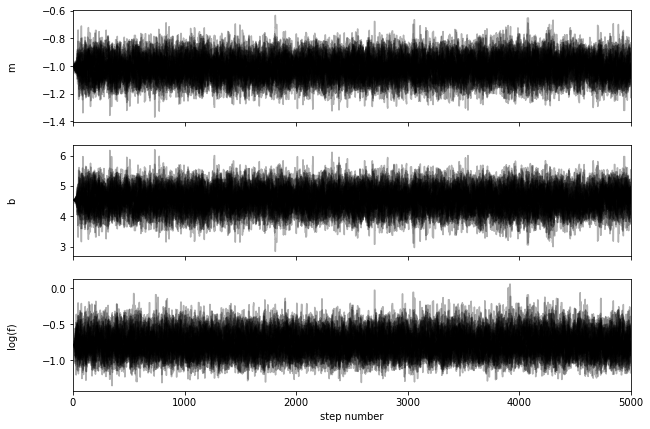

In [35]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [36]:
tau = sampler.get_autocorr_time()
print(tau)

[35.90558707 36.19101655 35.83120472]


In [37]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


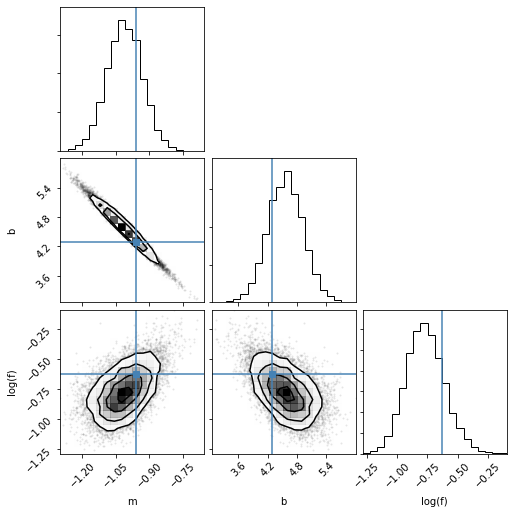

In [38]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
);

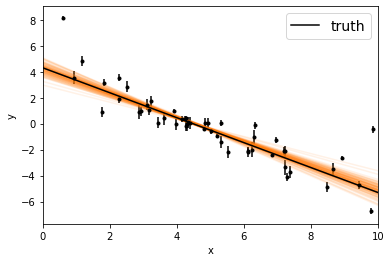

In [31]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");